# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [ ]:
tf.__version__

'2.2.0'

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Load the dataset from your drive folder

train = loadmat('/home/marcin/Pictures/capstone_project/train_32x32.mat')
test = loadmat('/home/marcin/Pictures/capstone_project/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
train_data, train_targets = train['X'], train['y']
test_data, test_targets = test['X'], test['y']

In [ ]:
print(train_data.shape)
print(train_targets.shape)

(32, 32, 3, 73257)
(73257, 1)


In [ ]:
print(test_data.shape)
print(test_targets.shape)

(32, 32, 3, 26032)
(26032, 1)


In [ ]:
i=0
for target in train_targets[:300]:
  if target == 10:
    print('index =', i)
  i += 1

index = 52
index = 84
index = 93
index = 96
index = 108
index = 144
index = 182
index = 206
index = 215
index = 218
index = 226
index = 236
index = 274
index = 294


**Zeros are represented in targets as "10"**

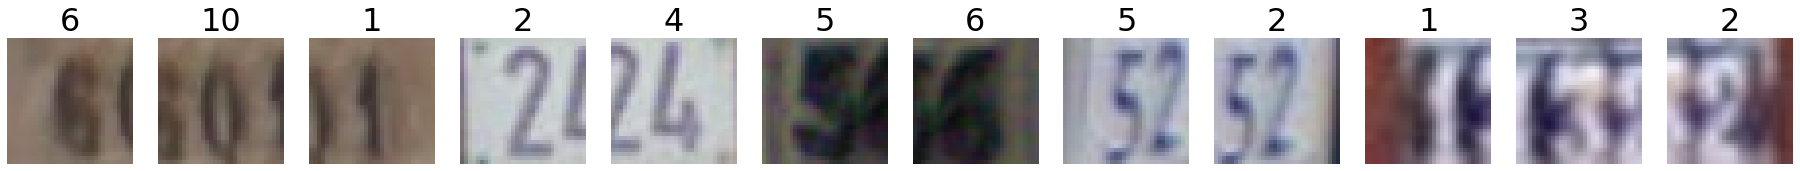

In [ ]:
num_of_img = 12
first_img_index = 51
fig, ax = plt.subplots(1, num_of_img, figsize=(32, 3))

for i in range(num_of_img):
    ax[i].set_axis_off()
    ax[i].imshow(train_data[..., i + first_img_index])
    ax[i].set_title(train_targets[i + first_img_index][0], size=32)

**Instead 0's will be represented as 0**

In [ ]:
i = 0
for target in train_targets[:]:
  if target == 10:
    train_targets[i] = 0
  i += 1

k=0
for target in test_targets[:]:
  if target == 10:
    test_targets[k] = 0
  k += 1

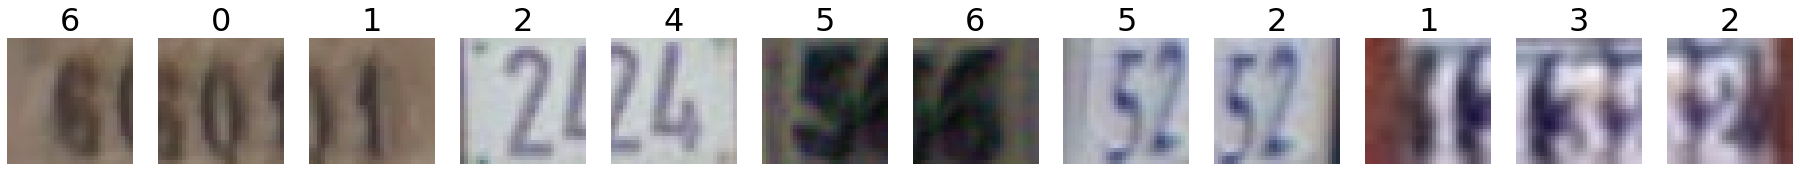

In [ ]:
num_of_img = 12
first_img_index = 51
fig, ax = plt.subplots(1, num_of_img, figsize=(32, 3))

for i in range(num_of_img):
    ax[i].set_axis_off()
    ax[i].imshow(train_data[..., i + first_img_index])
    ax[i].set_title(train_targets[i + first_img_index][0], size=32)

**Converting images to grayscale**




In [ ]:
def get_grayscale_image(data_images, samples=train_data.shape[3]):

  data_images_grayscale = np.zeros((samples, train_data.shape[0],
                             train_data.shape[1]))

  for img_num in range(samples):
    data_images_grayscale[img_num, ...] = np.average(data_images[:, :, :, img_num], 
                                                     axis=2)
    
  return data_images_grayscale[..., np.newaxis]

In [ ]:
test_data.shape[3]

26032

In [ ]:
train_data_grayscale = get_grayscale_image(train_data)
test_data_grayscale = get_grayscale_image(test_data, samples=test_data.shape[3])

**Training images**

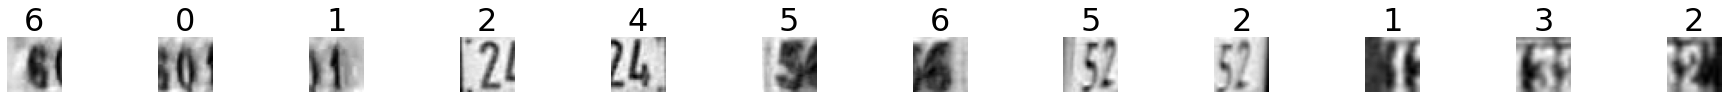

In [ ]:
num_of_img = 12
first_img_index = 51
fig, ax = plt.subplots(1, num_of_img, figsize=(32, 1))

for i in range(num_of_img):
    ax[i].set_axis_off()
    ax[i].imshow(train_data_grayscale[i + first_img_index], cmap='gray')
    ax[i].set_title(train_targets[i + first_img_index][0], size=32)

**Test images**

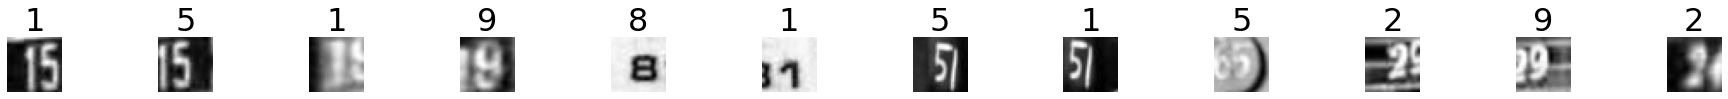

In [ ]:
num_of_img = 12
first_img_index = 51
fig, ax = plt.subplots(1, num_of_img, figsize=(32, 1))

for i in range(num_of_img):
    ax[i].set_axis_off()
    ax[i].imshow(test_data_grayscale[i + first_img_index], cmap='gray')
    ax[i].set_title(test_targets[i + first_img_index][0], size=32)

**Normalizing data**

In [ ]:
train_data_grayscale = (train_data_grayscale - train_data_grayscale.mean()) / train_data_grayscale.std()
test_data_grayscale = (test_data_grayscale - test_data_grayscale.mean()) / test_data_grayscale.std()


In [ ]:
train_data_grayscale[4, 3, :5]

array([[0.15943246],
       [0.22006684],
       [0.36828423],
       [0.46934153],
       [0.50976445]])

**One-hot encoding test and train targets**

In [ ]:
train_targets = tf.keras.utils.to_categorical(train_targets)
test_targets = tf.keras.utils.to_categorical(test_targets)

In [ ]:
train_targets.shape

(73257, 10)

In [ ]:
train_targets[1:5,]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

**Model structure and compilation**

In [ ]:
def get_mlp_model(input_shape=train_data_grayscale[1].shape):
  
  model = tf.keras.models.Sequential([
      Flatten(input_shape=input_shape),
      Dense(64, activation='relu', name='dense_1'),
      Dense(64, activation='relu', name='dense_2'),
      Dense(10, activation='softmax', name='dense_3')
  ])
  return model

In [ ]:
print('Shape passed to get_mlp_model function:', 
      train_data_grayscale[1].shape)

Shape passed to get_mlp_model function: (32, 32, 1)


In [ ]:
model = get_mlp_model(train_data_grayscale[1].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 70,410
Trainable params: 70,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lr = 0.001

def compile_model(model):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
compile_model(model)

**Callbacks**

In [ ]:
def get_best_epoch_callback():
  path='/home/marcin/Documents/Capstone_project/mlp_checkpoint_best'
  
  callback = ModelCheckpoint(path,
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False)
  return callback


def get_early_stopping_callback(patience=2):
  callback = EarlyStopping(monitor='val_loss',
                           patience=patience,
                           verbose=1)
  return callback

In [ ]:
best_epoch_callback = get_best_epoch_callback()
early_stopping_callback = get_early_stopping_callback()

**Fitting the model**

In [ ]:
history = model.fit(train_data_grayscale,
                    train_targets,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.15,
                    callbacks=[best_epoch_callback, early_stopping_callback])

Epoch 1/30
485/487 [============================>.] - ETA: 0s - loss: 1.3759 - accuracy: 0.5547
Epoch 00001: val_loss improved from inf to 1.04962, saving model to /home/marcin/Documents/Capstone_project/mlp_checkpoint_best
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/marcin/Documents/Capstone_project/mlp_checkpoint_best/assets
487/487 [==============================] - 1s 3ms/step - loss: 1.3747 - accuracy: 0.5551 - val_loss: 1.0496 - val_accuracy: 0.6744
Epoch 2/30
479/487 [============================>.] - ETA: 0s - loss: 0.9207 - accuracy: 0.7186
Epoch 00002: val_loss improved from 1.04962 to 0.86651, saving model to /home/marcin/Documents/Capstone_project/mlp_checkpoint_best
INFO:tensorflow:Assets written to: /home/marcin/Documents/Capstone_project/mlp_checkpoint_best/assets
487/487 [==============================] - 1s 2ms/step - loss: 0.9197 - accuracy: 0.7189 - val_loss: 0.8665 - val_accuracy: 0.7410
E

In [ ]:
test_loss, test_acc = model.evaluate(test_data_grayscale, test_targets)

814/814 [==============================] - 1s 1ms/step - loss: 0.8324 - accuracy: 0.7619


In [ ]:
print('Test loss = {:.03f}\nTest accuracy = {:.03f}'.format(test_loss, test_acc))

Test loss = 0.832
Test accuracy = 0.762


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
df = pd.DataFrame(
    {'val_loss': history.history['val_loss'],
     'loss': history.history['loss'],
     'accuracy': history.history['accuracy'],
     'val_accuracy': history.history['val_accuracy']},
    index=range(1, 8),
    )

df.head()

,val_loss,loss,accuracy,val_accuracy
1,1.049616,1.374741,0.555149,0.674402
2,0.866513,0.919726,0.718860,0.741014
3,0.821733,0.802591,0.757628,0.751297
4,0.763693,0.739411,0.777960,0.766949
5,0.722825,0.689612,0.795336,0.785877


<AxesSubplot:>

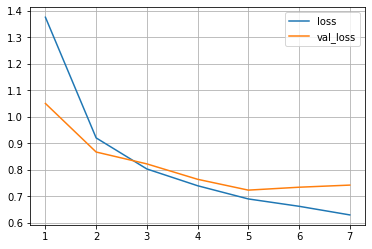

In [ ]:
df[['loss', 'val_loss']].plot(grid=True)

<AxesSubplot:>

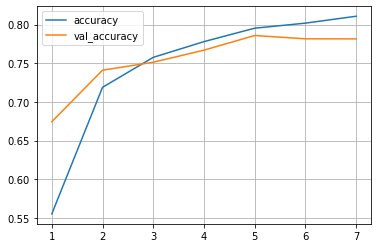

In [ ]:
df[['accuracy', 'val_accuracy']].plot(grid=True)

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

**Model structure and compilation**

In [ ]:
print('input_shape =', train_data_grayscale[1].shape)

input_shape = (32, 32, 1)


In [ ]:
def get_cnn_model(input_shape=train_data_grayscale[1].shape):
  model = tf.keras.models.Sequential([
                                      
                      Conv2D(16, (3, 3), input_shape=(input_shape), 
                             activation='relu',
                             bias_initializer='zeros'),

                      MaxPooling2D((2, 2)),

                      BatchNormalization(),

                      Conv2D(32, (3,3), activation='relu'),

                      MaxPooling2D((2, 2)),

                      BatchNormalization(),

                      Conv2D(64, (3,3), activation='relu'),

                      BatchNormalization(),

                      Flatten(),

                      Dense(32, activation='relu', kernel_regularizer='l2'),

                      Dense(10, activation='softmax'),
  ])

  return model

In [ ]:
def compile_model(model, lr=0.0001):
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Callbacks**

In [ ]:
def get_best_epoch_callback_cnn():
  path='/home/marcin/Documents/Capstone_project/cnn_checkpoint_best'
  
  callback = ModelCheckpoint(path,
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False)
  return callback


def get_early_stopping_callback_cnn(patience=2, monitor='val_loss'):
  callback = EarlyStopping(monitor=monitor,
                           patience=patience,
                           verbose=1)
  return callback

In [ ]:
cnn_best_epoch_callback = get_best_epoch_callback_cnn()
cnn_early_stopping_callback = get_early_stopping_callback_cnn(3)

**Fitting the model**

In [ ]:
model = get_cnn_model(train_data_grayscale[1].shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [ ]:
compile_model(model)

In [ ]:
epochs=30

history = model.fit(train_data_grayscale,
                    train_targets,
                    epochs=epochs,
                    batch_size=128,
                    validation_split=0.15,
                    callbacks=[cnn_best_epoch_callback, cnn_early_stopping_callback])

Epoch 1/30
480/487 [============================>.] - ETA: 0s - loss: 1.2085 - accuracy: 0.7786
Epoch 00001: val_loss improved from 1.56558 to 1.05020, saving model to /home/marcin/Documents/Capstone_project/cnn_checkpoint_best
INFO:tensorflow:Assets written to: /home/marcin/Documents/Capstone_project/cnn_checkpoint_best/assets
487/487 [==============================] - 3s 6ms/step - loss: 1.2063 - accuracy: 0.7792 - val_loss: 1.0502 - val_accuracy: 0.8182
Epoch 2/30
472/487 [============================>.] - ETA: 0s - loss: 0.9371 - accuracy: 0.8372
Epoch 00002: val_loss improved from 1.05020 to 0.86046, saving model to /home/marcin/Documents/Capstone_project/cnn_checkpoint_best
INFO:tensorflow:Assets written to: /home/marcin/Documents/Capstone_project/cnn_checkpoint_best/assets
487/487 [==============================] - 3s 6ms/step - loss: 0.9342 - accuracy: 0.8376 - val_loss: 0.8605 - val_accuracy: 0.8488
Epoch 3/30
477/487 [============================>.] - ETA: 0s - loss: 0.7820 -

**Graphs**

In [ ]:

df = pd.DataFrame(
    {'val_loss': history.history['val_loss'],
     'loss': history.history['loss'],
     'accuracy': history.history['accuracy'],
     'val_accuracy': history.history['val_accuracy']},
    index=range(1, 30 + 1),
    )

df.head()

,val_loss,loss,accuracy,val_accuracy
1,1.050195,1.206298,0.779180,0.818182
2,0.860463,0.934195,0.837605,0.848758
3,0.743228,0.781543,0.861293,0.862681
4,0.662919,0.676608,0.875313,0.872600
5,0.602303,0.600035,0.885174,0.879152


<AxesSubplot:title={'center':'Accuracies vs epochs'}>

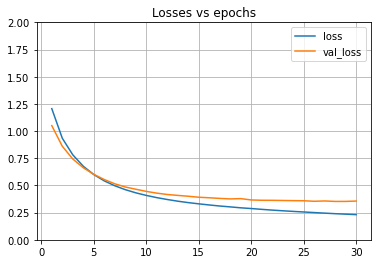

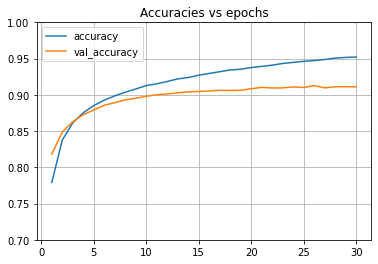

In [ ]:
df[['loss', 'val_loss']].plot(grid=True, ylim=(0, 2), title='Losses vs epochs')
df[['accuracy', 'val_accuracy']].plot(grid=True, ylim=(0.7, 1), title='Accuracies vs epochs')

**Model evaluation on test set**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_grayscale, test_targets)
print('Test loss = {:.03f}'.format(test_loss))
print('Test accuracy = {:.03f}'.format(test_accuracy))

814/814 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.9029
Test loss = 0.383
Test accuracy = 0.903


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
! ls -lh /home/marcin/Documents/Capstone_project

total 8,0K
drwxr-xr-x 4 marcin marcin 4,0K sty  8 18:04 cnn_checkpoint_best
drwxr-xr-x 4 marcin marcin 4,0K sty  8 17:54 mlp_checkpoint_best


In [ ]:
test_data_raw, test_targets_raw = test['X'], test['y']

**Predictions for MLP model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_mlp_model = load_model('/home/marcin/Documents/Capstone_project/mlp_checkpoint_best')

In [ ]:
image_indexes = [32, 435, 4533, 7567, 25543]

df_probabilities = pd.DataFrame({}, index=range(0, 10))

def get_prediction(id):
  test_img = test_data_grayscale[id, ...]
  preds = best_mlp_model.predict(test_img[np.newaxis, ...])
  return preds

for i in range(len(image_indexes)):
  df_probabilities.insert(i, str(image_indexes[i]), 
                          get_prediction(image_indexes[i])[0])

df_probabilities

,32,435,4533,7567,25543
0,0.018219,6.451244e-05,0.078535,0.000015,2.087810e-13
1,0.020115,5.331291e-03,0.031063,0.000468,2.259156e-11
2,0.027306,1.511783e-01,0.002295,0.000029,1.636767e-09
3,0.024261,1.769177e-03,0.010476,0.042667,9.999965e-01
4,0.077036,6.841851e-07,0.573967,0.000032,9.741660e-11
5,0.148101,3.620827e-06,0.012158,0.953533,9.716682e-07
6,0.383293,8.621002e-07,0.166725,0.001017,6.700790e-12
7,0.016661,8.412678e-01,0.001838,0.000477,7.858468e-13
8,0.248031,3.160462e-04,0.106957,0.001240,2.467407e-06
9,0.036976,6.771163e-05,0.015986,0.000521,4.047356e-08


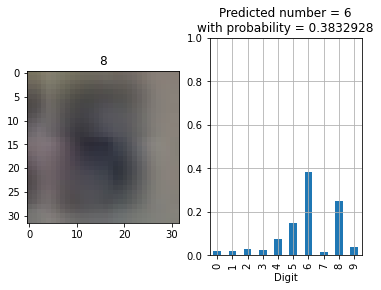

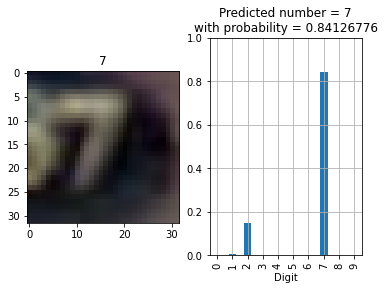

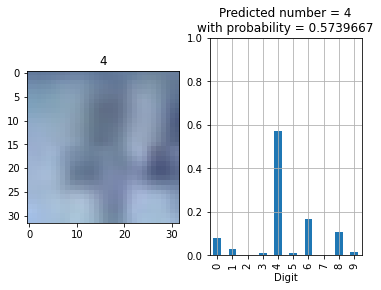

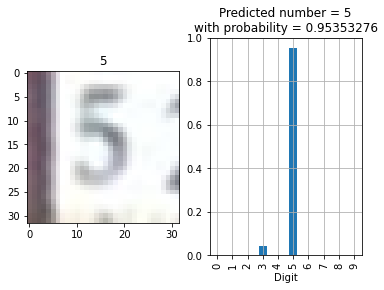

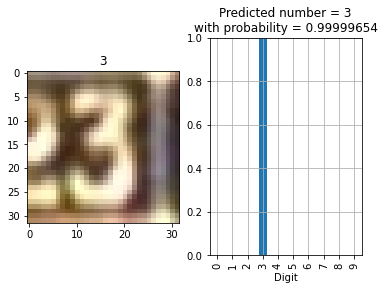

In [ ]:
for i in range(5):
  fig, (ax, ax2) = plt.subplots(ncols=2)

  ax.imshow(test_data_raw[..., image_indexes[i]])
  ax.set_title(test_targets_raw[image_indexes[i]][0])

  max_probability = 'Predicted number = '\
  + str(df_probabilities[str(image_indexes[i])].argmax()) \
  +'\nwith probability = ' + str(df_probabilities[str(image_indexes[i])].max())
  ax2 = df_probabilities[str(image_indexes[i])].plot.bar(
      xlabel='Digit', title=max_probability , ylim=(0,1),
      grid=True, legend=False)
  


**Predictions for CNN model**

In [ ]:
best_cnn_model = load_model('/home/marcin/Documents/Capstone_project/cnn_checkpoint_best')

In [ ]:
image_indexes = [32, 435, 4533, 7567, 25543]

df_probabilities = pd.DataFrame({}, index=range(0, 10))

def get_prediction(id):
  test_img = test_data_grayscale[id, ...]
  preds = best_cnn_model.predict(test_img[np.newaxis, ...])
  return preds

for i in range(len(image_indexes)):
  df_probabilities.insert(i, str(image_indexes[i]), 
                          get_prediction(image_indexes[i])[0])

df_probabilities

,32,435,4533,7567,25543
0,0.001272,4.220291e-06,0.000856,1.279206e-06,0.000009
1,0.000336,4.255832e-05,0.002325,3.161107e-07,0.000004
2,0.001307,2.453201e-05,0.000710,7.011399e-07,0.000032
3,0.001497,2.948743e-06,0.000845,8.894220e-05,0.999647
4,0.002840,7.787302e-07,0.982367,1.754315e-07,0.000011
5,0.181843,7.172712e-07,0.000978,9.984167e-01,0.000017
6,0.497702,6.652152e-06,0.002614,1.372810e-03,0.000002
7,0.000198,9.999162e-01,0.000138,7.342958e-07,0.000029
8,0.309153,2.995431e-07,0.008833,1.120556e-04,0.000177
9,0.003852,9.593099e-07,0.000333,6.427829e-06,0.000073


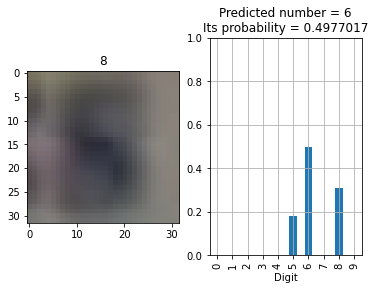

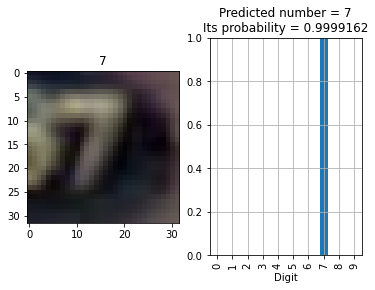

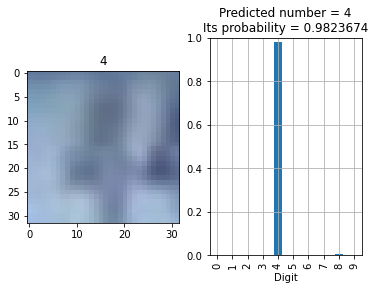

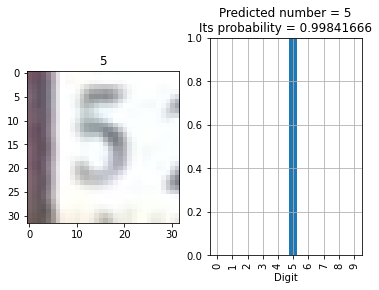

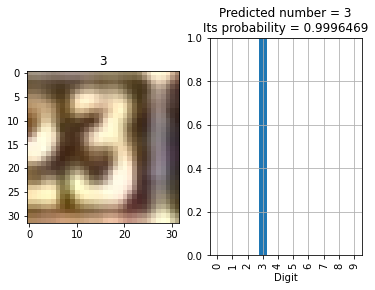

In [ ]:
for i in range(5):
  fig, (ax, ax2) = plt.subplots(ncols=2)

  ax.imshow(test_data_raw[..., image_indexes[i]])
  ax.set_title(test_targets_raw[image_indexes[i]][0])

  max_probability = 'Predicted number = '\
  + str(df_probabilities[str(image_indexes[i])].argmax()) \
  +'\nIts probability = ' + str(df_probabilities[str(image_indexes[i])].max())
  ax2 = df_probabilities[str(image_indexes[i])].plot.bar(
      xlabel='Digit', title=max_probability , ylim=(0,1),
      grid=True, legend=False)
  
